In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'C:\Brain tumor\Train'
valid_path = 'C:\Brain tumor\Test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('C:\Brain tumor\Train\*')

In [7]:
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [13]:
training_set = train_datagen.flow_from_directory('C:\Brain tumor\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\Brain tumor\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
90/90 [==============================] - 352s 4s/step - loss: 2.6484 - accuracy: 0.5049 - val_loss: 2.4797 - val_accuracy: 0.5254
Epoch 2/10
90/90 [==============================] - 319s 4s/step - loss: 0.9156 - accuracy: 0.6519 - val_loss: 1.9673 - val_accuracy: 0.5533
Epoch 3/10
90/90 [==============================] - 318s 4s/step - loss: 0.7791 - accuracy: 0.6861 - val_loss: 2.5573 - val_accuracy: 0.5457
Epoch 4/10
90/90 [==============================] - 320s 4s/step - loss: 0.7401 - accuracy: 0.7111 - val_loss: 2.1734 - val_accuracy: 0.5736
Epoch 5/10
90/90 [==============================] - 319s 4s/step - loss: 0.7694 - accuracy: 0.7167 - val_loss: 2.8336 - val_accuracy: 0.5482
Epoch 6/10
90/90 [==============================] - 320s 4s/step - loss: 0.7043 - accuracy: 0.7362 - val_loss: 2.4023 - val_accuracy: 0.5964
Epoch 7/10
90/90 [==============================] - 371s 4s/step - loss: 0.897

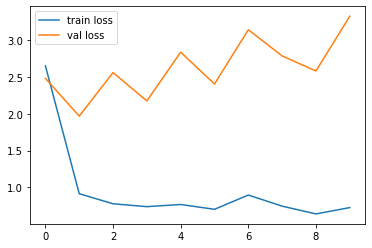

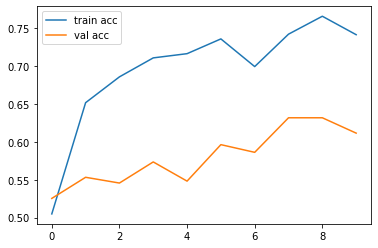

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')


In [16]:
# import tensorflow as tf

# from tensorflow.keras.models import load_model

# model.save('BTC_resnet50_new_model.h5')